#  **WALMART WEEKLY SALES PREDICTION**

***THE AIM OF THIS NOTEBOOK IS TO PREDICT WEEKLY SALES OF DIIFERENT STORES OF WALMART IN THE NEAR FUTURE***
![](https://wallpapercave.com/wp/tlGJfG1.jpg)


**THE CONTENTS OF THIS NOTEBOOK ARE AS FOLLOWS -**

1. *IMPORTING LIBRARIES AND DOWNLOADING DATASETS*
2. *FEATURE ENGINEERING*
3. *EXPLORATORY DATA ANALYSIS AND VISUALIZATION*
4. *PREPROCESSING*
5. *SPLITTING TRAINING DATASET*
6. *TRAINING ML MODELS WITH TUNED HYPERPARAMETERS*
7. *EVALUATIG MODELS ON TRAINING AND VALIDATION DATASETS*
8. *VISUALIZING FEATURE IMPORTANCES*
9. *PROCESSING THE TEST DATASET*
10. *EVALUATING THE TEST DATASET AND AVERAGING PREDICTIONS*
11. *SAVING PROCESSED DATA, MODELS AND SUBMISSION DATASET AS CSV*
 



# **IMPORTING LIBRARIES AND MODULES** 

In [1]:
!pip install pyarrow --quiet
!pip install opendatasets
import joblib
import warnings
warnings.filterwarnings('ignore')
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
from zipfile import ZipFile
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import plot_tree, export_text
%matplotlib inline

**DOWNLOADING THE DATASETS USING OPENDATASETS LIBRARY**

In [2]:
od.download('https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  whitewolf47


Your Kaggle Key:

  ································


100%|██████████| 2.70M/2.70M [00:00<00:00, 154MB/s]


Extracting archive ./walmart-recruiting-store-sales-forecasting/walmart-recruiting-store-sales-forecasting.zip to ./walmart-recruiting-store-sales-forecasting


In [3]:
os.listdir('./walmart-recruiting-store-sales-forecasting')

['sampleSubmission.csv.zip',
 'stores.csv',
 'test.csv.zip',
 'train.csv.zip',
 'features.csv.zip']

***EXTRACTING THE DATA FROM COMPRESSED FILES***

In [4]:
with ZipFile('./walmart-recruiting-store-sales-forecasting/test.csv.zip') as f:
    f.extractall(path='./walmart-recruiting-store-sales-forecasting/test-file')
    
with ZipFile('./walmart-recruiting-store-sales-forecasting/features.csv.zip') as f:
    f.extractall(path='./walmart-recruiting-store-sales-forecasting/features-file')
    
with ZipFile('./walmart-recruiting-store-sales-forecasting/train.csv.zip') as f:
    f.extractall(path='./walmart-recruiting-store-sales-forecasting/train-file')
    
with ZipFile('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip') as f:
    f.extractall(path='./walmart-recruiting-store-sales-forecasting/sampleSubmission-file')

***CONVERTING CSV FILES TO PANDAS DATAFRAMES***

In [5]:
train_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/train-file/train.csv')
features_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/features-file/features.csv')
test_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/test-file/test.csv')
submission_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/sampleSubmission-file/sampleSubmission.csv')
stores_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/stores.csv')

***LETS LOOK AT SAMPLES OF THE DATA***

In [6]:
train_df.sample(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
333018,35,17,2012-04-13,14616.14,False
177815,19,5,2011-03-04,37078.86,False
98916,11,8,2011-07-22,33397.95,False
399030,43,8,2012-01-20,13787.91,False
65328,7,55,2010-10-22,5375.60,False
157122,16,96,2010-07-09,156.86,False
221281,23,33,2011-01-21,6084.85,False
386996,41,49,2011-04-08,5078.39,False
242048,25,37,2011-10-14,3344.19,False
176521,18,93,2010-11-26,1052.97,True


In [7]:
features_df.sample(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
4833,27,2012-01-13,41.30,3.666,8081.05,16237.87,542.46,643.15,6238.31,140.704821,8.009,False
5212,29,2012-04-27,51.42,4.023,1238.43,NaN,6.62,58.84,1407.86,137.978133,9.140,False
7400,41,2012-05-25,54.89,3.804,8215.27,NaN,277.14,1198.25,2444.61,197.588605,6.547,False
151,1,2012-12-28,44.79,3.108,12659.55,37101.13,174.78,74.46,1208.86,223.960414,6.573,True
7321,41,2010-11-19,31.34,2.758,NaN,NaN,NaN,NaN,NaN,191.031217,7.508,False
2840,16,2012-03-16,38.02,3.486,3501.15,0.30,1.33,1396.55,1515.46,197.045721,6.162,False
7427,41,2012-11-30,41.39,3.436,3610.17,0.15,3443.96,410.38,9284.50,199.563870,6.195,False
3515,20,2011-03-11,39.53,3.582,NaN,NaN,NaN,NaN,NaN,207.188288,7.343,False
3865,22,2010-12-03,39.42,3.065,NaN,NaN,NaN,NaN,NaN,136.607571,8.572,False
2662,15,2012-04-13,43.52,4.187,3408.63,3269.14,13.58,1547.19,1809.75,137.868000,8.150,False


In [8]:
stores_df.sample(10)

,Store,Type,Size
15,16,B,57197
26,27,A,204184
6,7,B,70713
33,34,A,158114
36,37,C,39910
4,5,B,34875
40,41,A,196321
34,35,B,103681
43,44,C,39910
20,21,B,140167


***MERGING DATASETS TO GET PROPER DATASET WITH ALL DATA***

In [9]:
#MERGING FEATURE AND STORES DATA
features_stores_df = features_df.merge(stores_df, how='inner', on = "Store")

#THE PROPER TRAINING DATASET
merged_df = train_df.merge(features_stores_df, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

#THE TEST DATASET
merged_test_df = test_df.merge(features_stores_df, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

***LETS LOOK AT SAMPLES OF MERGED DATA***

In [10]:
merged_df.sample(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
267356,28,3,2011-10-28,7828.34,False,67.41,3.727,NaN,NaN,NaN,NaN,NaN,129.793677,12.890,A,206302
80559,9,14,2010-12-03,8487.11,False,49.89,2.708,NaN,NaN,NaN,NaN,NaN,215.144520,6.560,B,125833
48645,5,97,2010-07-09,619.34,False,81.14,2.642,NaN,NaN,NaN,NaN,NaN,211.664291,6.496,B,34875
387598,41,56,2010-07-16,4384.06,False,69.06,2.699,NaN,NaN,NaN,NaN,NaN,189.612546,7.335,A,196321
46977,5,72,2012-08-31,8966.02,False,84.25,3.638,5211.69,49.00,13.00,2799.14,2740.48,222.895812,5.603,B,34875
338501,35,81,2010-04-09,10445.66,False,62.62,2.869,NaN,NaN,NaN,NaN,NaN,135.785636,9.051,B,103681
137971,14,98,2010-10-22,17761.65,False,53.15,2.917,NaN,NaN,NaN,NaN,NaN,182.855869,8.724,A,200898
273706,28,56,2011-12-09,580.61,False,42.17,3.644,6628.73,21.00,140.19,6168.78,14073.59,129.855533,12.890,A,206302
3240,1,24,2012-06-22,4129.07,False,78.39,3.346,8624.56,171.25,3.05,2524.07,7063.68,221.803021,7.143,A,151315
299987,31,52,2011-01-28,487.27,False,44.04,3.010,NaN,NaN,NaN,NaN,NaN,211.855267,8.028,A,203750


**FEATURE ENGINEERING**

*HERE, I HAVE DEFINED A FUNCTION TO CONVERT THE **DATE** COLUMN INTO USELFUL SEPARATE COLUMNS*

In [11]:
def split_date(df):
    #CONVERTING THE DATA COLUMN TO DATETIME
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year            #YEAR
    df['Month'] = df.Date.dt.month          #MONTH
    df['Day'] = df.Date.dt.day              #DAY
    df['Week'] = df.Date.dt.week            #WEEK

In [12]:
split_date(merged_df)
split_date(merged_test_df)

In [13]:
merged_df.sample(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
327798,34,65,2011-09-02,39706.74,False,78.24,3.533,NaN,NaN,NaN,NaN,NaN,129.325936,10.641,A,158114,2011,9,2,35
75766,8,60,2010-06-25,237.60,False,81.78,2.653,NaN,NaN,NaN,NaN,NaN,214.712629,6.290,A,155078,2010,6,25,25
147364,15,93,2012-10-19,346.24,False,52.89,4.153,710.90,NaN,1.68,176.01,1098.68,138.833613,7.992,B,123737,2012,10,19,42
286779,30,2,2011-10-14,11992.13,False,69.79,3.274,NaN,NaN,NaN,NaN,NaN,217.004826,7.441,C,42988,2011,10,14,41
116711,12,91,2011-09-30,6144.95,False,83.26,3.877,NaN,NaN,NaN,NaN,NaN,129.606067,13.503,B,112238,2011,9,30,39
398443,43,4,2010-02-12,20066.82,True,47.99,2.548,NaN,NaN,NaN,NaN,NaN,203.201097,9.521,C,41062,2010,2,12,6
181499,19,33,2010-11-26,12626.55,True,42.62,3.186,NaN,NaN,NaN,NaN,NaN,132.836933,8.067,A,203819,2010,11,26,47
235748,24,87,2012-05-18,22444.01,False,63.10,4.029,5955.53,NaN,187.00,1529.05,4424.94,138.106581,8.983,A,203819,2012,5,18,20
110980,12,23,2012-02-10,40426.30,True,52.27,3.722,20281.03,2551.32,14.99,10597.74,7457.16,130.384903,12.187,B,112238,2012,2,10,6
388211,41,67,2011-04-29,11703.63,False,39.81,3.663,NaN,NaN,NaN,NaN,NaN,192.624332,6.934,A,196321,2011,4,29,17


# **EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

***LETS LOOK AT WEEKLY SALES OF 3 YEARS COMBINED***

In [14]:
weekly_sales = merged_df.groupby('Week')['Weekly_Sales'].sum()

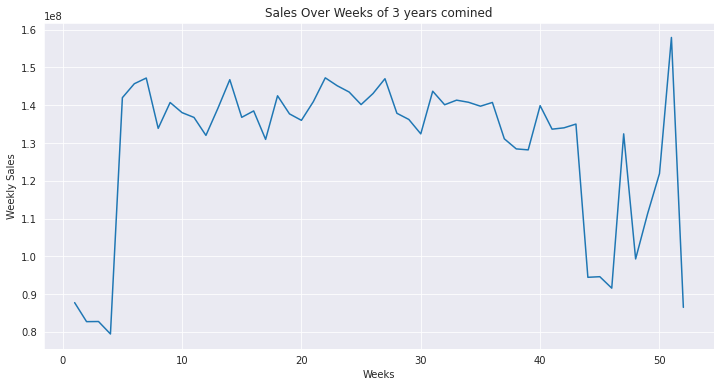

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.title('Sales Over Weeks of 3 years comined')
plt.plot(np.arange(1,53), weekly_sales)
plt.xlabel('Weeks')
plt.ylabel('Weekly Sales');

***LETS COMPARE SALES OF 3 DIFFERENT YEARS***

Text(0.5, 1.0, 'Sales Over Years')

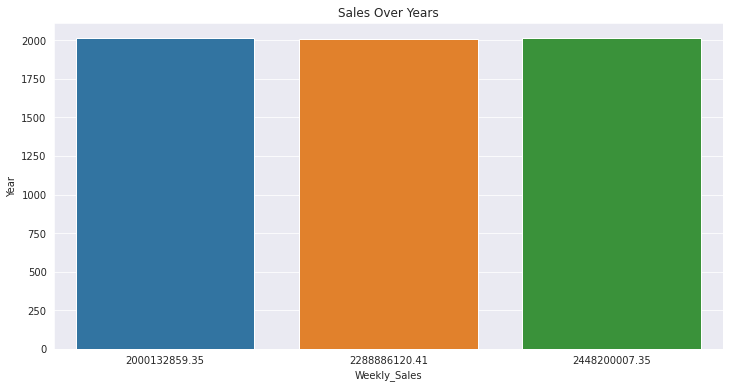

In [16]:
yearly_sales = merged_df.groupby('Year').sum()
plt.figure(figsize=(12,6))
sns.barplot(x='Weekly_Sales', y=yearly_sales.index, data=yearly_sales);
plt.title('Sales Over Years')

> IT L00KS LIKE THERE ISN'T A VISIBLE DIFFERENCE IN SALES(COMBINED) OF 3 YEARS 

***LETS LOOK AT VARIATION OF WEEKLY SALES WITH TEMPERATURE***

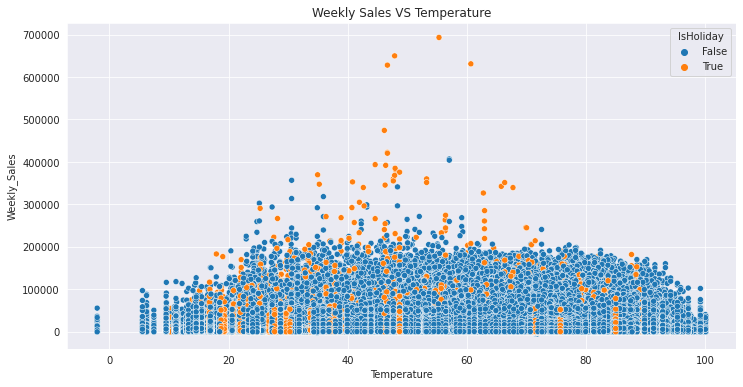

In [17]:
plt.figure(figsize=(12,6))
plt.title('Weekly Sales VS Temperature')
sns.set_style('darkgrid')
sns.scatterplot ( data = merged_df, x = 'Temperature', y =  'Weekly_Sales', hue = 'IsHoliday');

> IT SEEMS LIKE THERE IS A VERY SMALL DECREASE IN SALES WITH LESS TEMPERATURE

**LETS LOOK AT CPI**

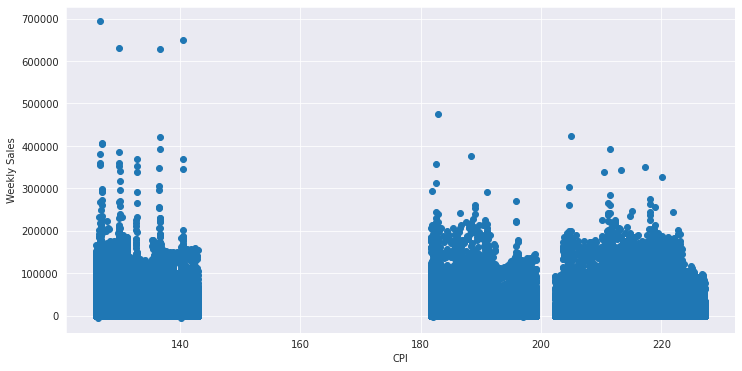

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(merged_df['CPI'] , merged_df['Weekly_Sales'])
plt.ylabel('Weekly Sales')
plt.xlabel('CPI');

**LETS LOOK AT UNEMPLOYMENT**

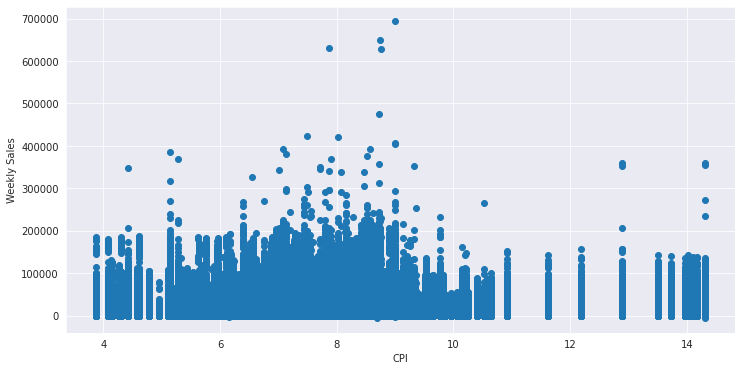

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(merged_df['Unemployment'] , merged_df['Weekly_Sales'])
plt.ylabel('Weekly Sales')
plt.xlabel('CPI');

***LETS LOOK AT VARIATION OF WEEKLY SALES WITH SIZE OF STORES***

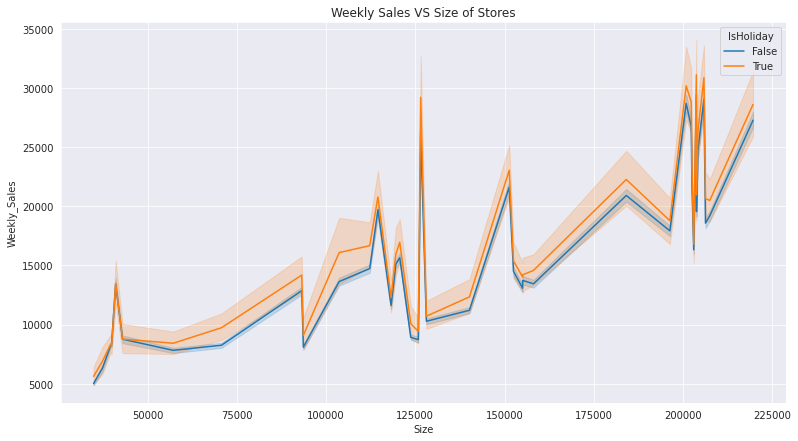

In [20]:
plt.figure(figsize=(13,7))
plt.title('Weekly Sales VS Size of Stores')
sns.lineplot ( data = merged_df, x = 'Size', y =  'Weekly_Sales', hue = 'IsHoliday');

> IT LOOKS LIKE THERE IS A WEAK LINEAR RELATIONSHIP B/W WEEKLY SALES AND SIZE OF STORES

***LETS COMPARE WEEKLY SALES WITH DEPARTMENTS***

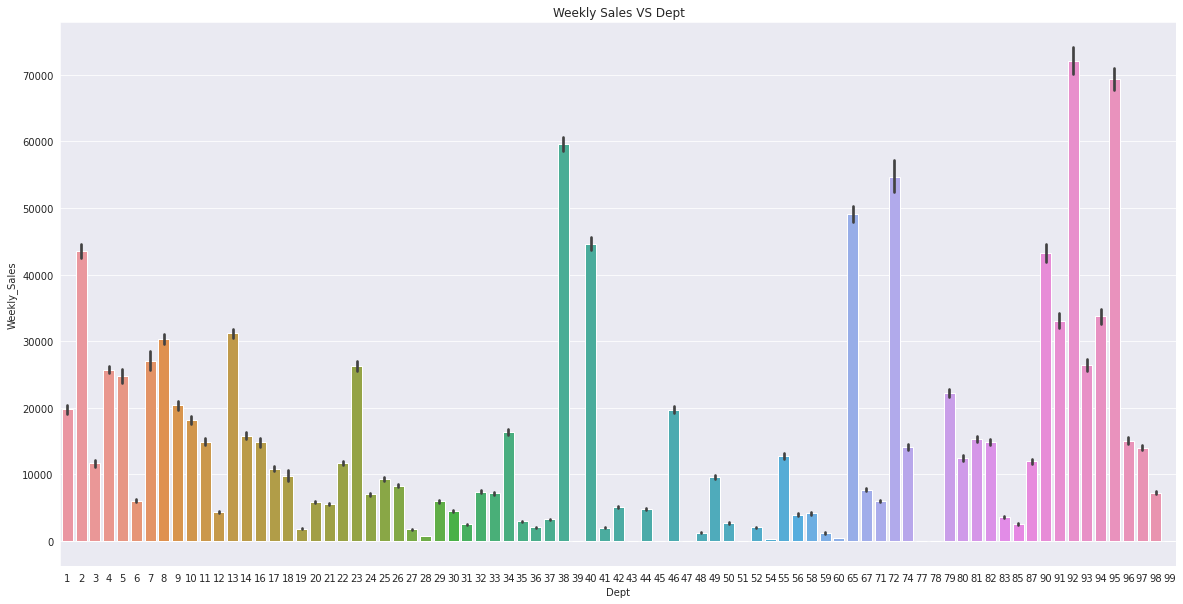

In [21]:
plt.figure(figsize=(20,10))
plt.title('Weekly Sales VS Dept')
sns.barplot ( data = merged_df[merged_df.Year == 2010], x = 'Dept', y =  'Weekly_Sales');

***LETS VISUALIZE CORRELATION OF FEATURES WITH WEEKLY SALES WITH THE HELP OF A HEATMAP***

Text(0.5, 1.0, 'Heatmap of Correlations')

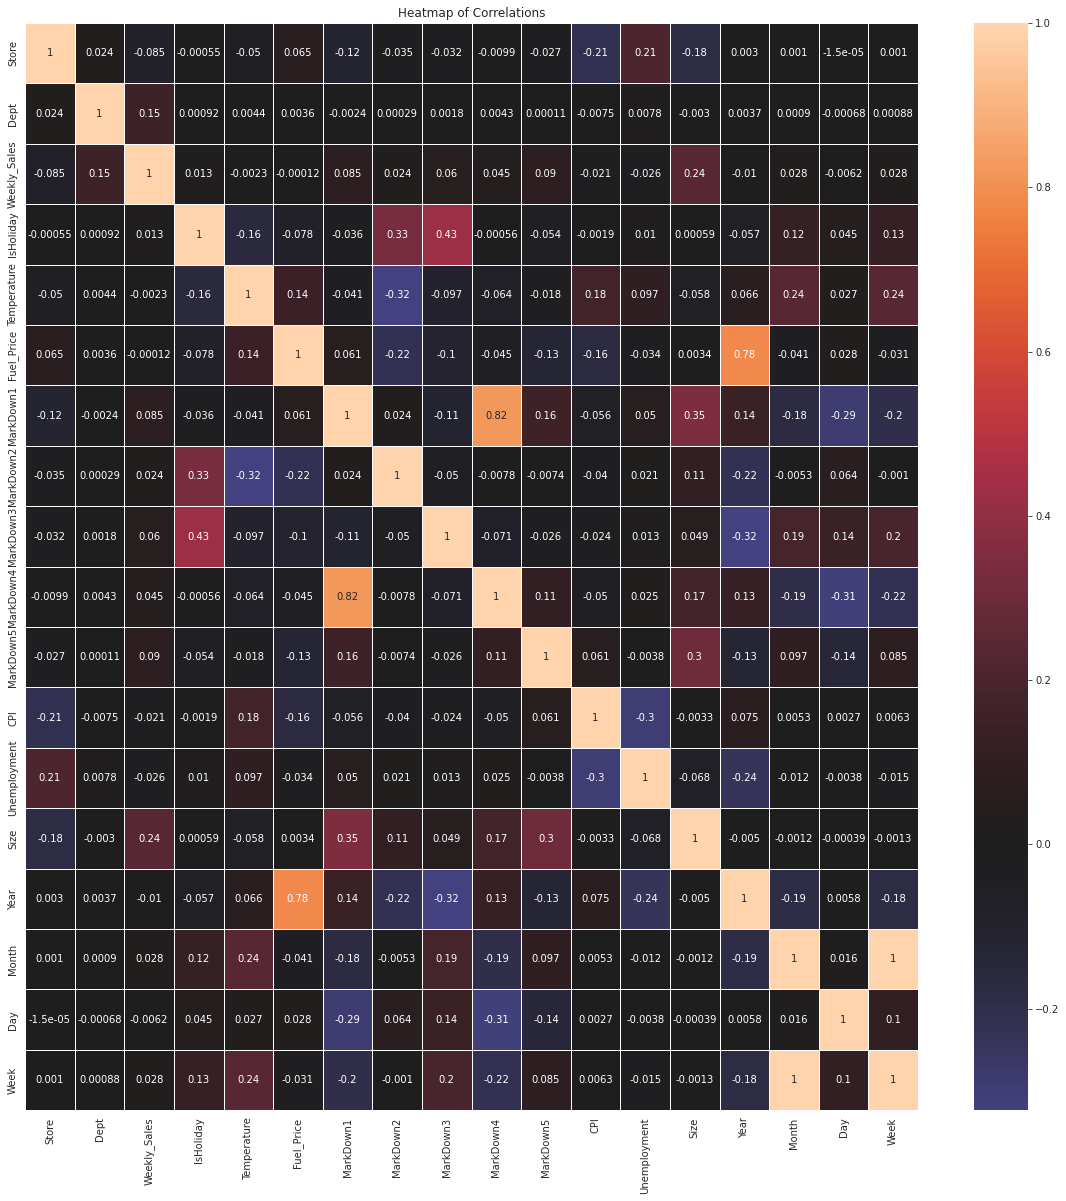

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(merged_df.corr(), center=0, annot=True, linewidths=1);
plt.title('Heatmap of Correlations')

***LETS COMPARE WEEKLY SALES WITH TYPE OF STORES***

Text(0.5, 1.0, 'Weekly Sales Acc To Type of Stores')

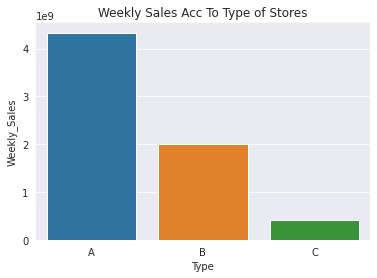

In [23]:
weeklysales_bytype = merged_df.groupby('Type').sum()
sns.barplot(x=weeklysales_bytype.index, y='Weekly_Sales', data=weeklysales_bytype)
plt.title('Weekly Sales Acc To Type of Stores')

> IT LOOK LIKES WEEKLY SALES OF A STORE HIGHLY DEPENDS ON THE TYPE OF STORE IT IS WITH TYPE A STORES WITH MOST WEEKLY SALES 

***LETS LOOK AT VARIATION OF WEEKLY SALES WITH MARKDOWNS(DISCOUNT SALES)***

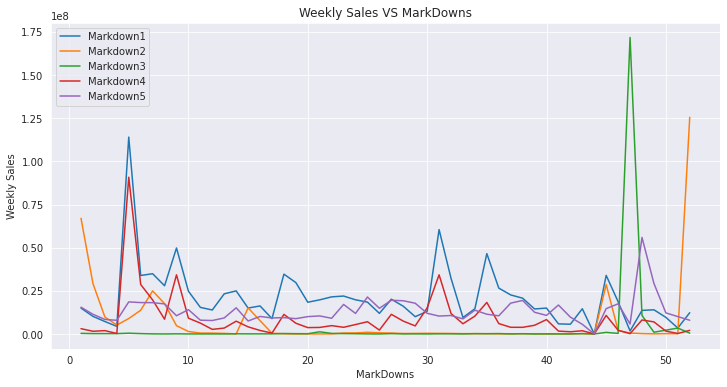

In [24]:
week_df = merged_df.groupby('Week').sum()
week_df.sample(10)
plt.figure(figsize=(12,6))
plt.title('Weekly Sales VS MarkDowns')
plt.plot(week_df.index, week_df.MarkDown1)
plt.plot(week_df.index, week_df.MarkDown2)
plt.plot(week_df.index, week_df.MarkDown3)
plt.plot(week_df.index, week_df.MarkDown4)
plt.plot(week_df.index, week_df.MarkDown5)
plt.legend(['Markdown1','Markdown2','Markdown3','Markdown4','Markdown5'])
plt.xlabel('MarkDowns')
plt.ylabel('Weekly Sales');

# **PREPROCESSING OF DATA**

In [25]:
x_train = merged_df.copy()

***IDENTIFYING INPUT, TARGET, NUMERIC AND CATEGORICAL COLUMNS***

In [26]:
#INPUT AND TARGET COLUMNS
input_cols = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Week']
target_col = 'Weekly_Sales'

#SEPARATING THE INPUT AND TARGET COLUMN DATA INTO DIFFERNET DFs
X_train = x_train[input_cols]
X_targets = x_train[target_col]

#NUMERIC AND CATEGORICAL CLOUMNS
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = ['IsHoliday', 'Type']

**IMPUTING MISSING VALUES**

In [27]:
#LETS LOOK AT THE NO OF MISSING VALUES 
X_train.isna().sum()

Store                0
Dept                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Week                 0
dtype: int64

In [28]:
#REPLACING MISSING VALUES WITH 0
X_train.replace(np.NaN, 0, inplace=True)
X_train.isna().sum()

Store           0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
dtype: int64

> HERE I HAVE REPLACED THE MISSING VALUES WITH 0 BECAUSE THEY REPRESENT NO DISCOUNT SALES, SO REPLACING THEM WITH 0 IS THE BEST POSSIBLE APPROACH

**SCALING THE DATA**

In [29]:
#DECLARING THE SCALER OBJECT
scaler = MinMaxScaler()

#FITTING THE DATA INTO THE SCALER
scaler.fit(X_train[numeric_cols])

#TRANSFORMING THE SCALED DATA INTO THE NUMERIC COLUMNS
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])

In [30]:
X_train.sample(10)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week
124756,0.272727,0.581633,False,0.605773,0.199900,0.000000,0.002536,0.000205,0.000000,0.000000,0.000712,0.405214,A,1.000000,0.411765
45564,0.090909,0.459184,False,0.710568,0.710922,0.017624,0.009775,0.000205,0.003053,0.015135,0.949236,0.184205,B,0.000000,0.274510
389917,0.909091,0.918367,False,0.351859,0.128257,0.000000,0.002536,0.000205,0.000000,0.000000,0.641602,0.347805,A,0.873876,0.941176
115097,0.250000,0.714286,False,0.642759,0.651303,0.000000,0.002536,0.000205,0.000000,0.000000,0.026253,0.944700,B,0.418751,0.235294
61693,0.136364,0.204082,False,0.404697,0.733467,0.023855,0.010776,0.000306,0.008146,0.013906,0.708309,0.403584,B,0.193984,0.294118
372141,0.886364,0.081633,True,0.342466,0.299599,0.000000,0.002536,0.000205,0.000000,0.000000,0.066947,0.134943,A,0.650663,0.901961
242753,0.545455,0.438776,False,0.744227,0.686373,0.000000,0.002536,0.000205,0.000000,0.000000,0.817003,0.325379,B,0.504647,0.588235
265736,0.590909,0.908163,False,0.734149,0.736473,0.000000,0.002536,0.000205,0.000000,0.000000,0.139024,0.380583,A,0.916437,0.627451
341577,0.795455,0.102041,False,0.770939,0.725451,0.000000,0.002536,0.000205,0.000000,0.000000,0.876021,0.423711,A,0.027253,0.352941
202964,0.454545,0.418367,False,0.871526,0.090681,0.000000,0.002536,0.000205,0.000000,0.000000,0.839498,0.414127,B,0.569925,0.470588


**ENCODING THE DATA**

In [31]:
#DECLARING THE ENCODER OBJECT
encoder = OneHotEncoder(sparse=False, handle_unknown = 'ignore')

#FITTING THE DATA INTO THE ENCODER
encoder.fit(X_train[categorical_cols])


OneHotEncoder(handle_unknown='ignore', sparse=False)

> LEST LOOK AT THE ENCODED COLUMNS

In [32]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
encoded_cols

['IsHoliday_False', 'IsHoliday_True', 'Type_A', 'Type_B', 'Type_C']

In [33]:
#TRANSFORMING THE ENCODED DATA INTO THE DATASET
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
X_train.sample(10)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
125744,0.272727,0.785714,False,0.493053,0.234970,0.000000,0.002536,0.000205,0.000000,0.000000,0.003129,0.405214,A,1.000000,0.313725,1.0,0.0,1.0,0.0,0.0
107125,0.227273,0.938776,False,0.870841,0.473447,0.247888,0.004193,0.000385,0.337587,0.056881,0.982513,0.235288,A,0.934381,0.588235,1.0,0.0,1.0,0.0,0.0
376683,0.886364,0.448980,False,0.256751,0.339679,0.000000,0.002536,0.000205,0.000000,0.000000,0.066065,0.134943,A,0.650663,0.980392,1.0,0.0,1.0,0.0,0.0
398172,0.954545,0.010204,False,0.789139,0.143788,0.000000,0.002536,0.000205,0.000000,0.000000,0.759203,0.547633,C,0.033489,0.392157,1.0,0.0,0.0,0.0,1.0
223553,0.500000,0.551020,False,0.698337,0.615731,0.034409,0.004493,0.000255,0.056279,0.030188,0.119991,0.026548,B,0.431173,0.568627,1.0,0.0,0.0,1.0,0.0
118807,0.272727,0.081633,False,0.424070,0.437876,0.000000,0.002536,0.000205,0.000000,0.000000,0.023085,0.344163,A,1.000000,0.176471,1.0,0.0,1.0,0.0,0.0
106737,0.227273,0.918367,False,0.890313,0.096192,0.000000,0.002536,0.000205,0.000000,0.000000,0.878407,0.332279,A,0.934381,0.627451,1.0,0.0,1.0,0.0,0.0
387934,0.909091,0.591837,False,0.675832,0.563627,0.000000,0.002536,0.000205,0.000000,0.000000,0.662547,0.289630,A,0.873876,0.490196,1.0,0.0,1.0,0.0,0.0
45668,0.090909,0.520408,False,0.477104,0.044589,0.000000,0.002536,0.000205,0.000000,0.000000,0.848217,0.257523,B,0.000000,0.137255,1.0,0.0,0.0,1.0,0.0
299128,0.681818,0.408163,False,0.647554,0.123747,0.000000,0.002536,0.000205,0.000000,0.000000,0.834406,0.414127,A,0.914088,0.235294,1.0,0.0,1.0,0.0,0.0


**FEATURE SELECTION**

*DROPPING THE UNNECESSARY COLUMNS*

In [34]:
#SINCE IsHoliday and Type columns are no longer needed for training, hence dropping them
X_train = X_train.drop(['IsHoliday', 'Type'], axis=1)

# SPLITTING THE DATASET INTO TRAINING INPUTS, TARGETS AND VALIDATION INPUTS & TARGETS

In [35]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(X_train, X_targets, test_size=0.25, random_state=42)

In [36]:
train_inputs.sample(10)

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
397492,0.931818,0.959184,0.539041,0.380261,0.000000,0.002536,0.000205,0.000000,0.000000,0.014985,0.466264,0.026063,0.058824,1.0,0.0,0.0,0.0,1.0
356534,0.840909,0.244898,0.444129,0.285070,0.000000,0.002536,0.000205,0.000000,0.000000,0.006596,1.000000,0.026063,0.921569,1.0,0.0,0.0,0.0,1.0
215040,0.477273,0.816327,0.593151,0.816132,0.000000,0.002536,0.000205,0.000000,0.000000,0.123784,0.419111,0.458367,0.372549,1.0,0.0,0.0,1.0,0.0
124396,0.272727,0.540816,0.681018,0.585671,0.000000,0.002536,0.000205,0.000000,0.000000,0.033277,0.287330,1.000000,0.705882,1.0,0.0,1.0,0.0,0.0
317599,0.727273,0.459184,0.606654,0.626253,0.016214,0.002551,0.000240,0.000000,0.011472,0.042710,0.356910,0.026063,0.098039,0.0,1.0,1.0,0.0,0.0
326700,0.750000,0.489796,0.461644,0.293587,0.000000,0.002536,0.000205,0.000000,0.000000,0.019089,0.624784,0.667069,0.117647,1.0,0.0,1.0,0.0,0.0
357363,0.840909,0.397959,0.816536,0.234970,0.000000,0.002536,0.000205,0.000000,0.000000,0.000712,0.979490,0.026063,0.411765,1.0,0.0,0.0,0.0,1.0
59889,0.136364,0.061224,0.494716,0.154309,0.000000,0.002536,0.000205,0.000000,0.000000,0.635886,0.492429,0.193984,0.686275,0.0,1.0,0.0,1.0,0.0
330299,0.750000,0.969388,0.468885,0.135772,0.000000,0.002536,0.000205,0.000000,0.000000,0.005364,0.540732,0.667069,0.196078,1.0,0.0,1.0,0.0,0.0
283385,0.636364,0.551020,0.714775,0.553607,0.058006,0.005676,0.000207,0.008381,0.018038,0.119921,0.504217,0.318073,0.490196,1.0,0.0,0.0,1.0,0.0


# TRAINING ML MODELS WITH BEST TUNED HYPERPARAMETERS

**LETS TRAIN A DECISION TREE ML MODEL**

In [37]:
#DECLARING THE MODEL OBJECT
model1 = DecisionTreeRegressor(random_state=42, max_depth=100, max_leaf_nodes=2**14, min_samples_split=10, min_samples_leaf=2)

#FITTING THE DATA INTO THE MODEL
model1.fit(train_inputs, train_targets)

DecisionTreeRegressor(max_depth=100, max_leaf_nodes=16384, min_samples_leaf=2,
                      min_samples_split=10, random_state=42)

*HERE I HAVE DEFINED A HELPER FUNCTION TO EVALUATE THE MODELS AND RETURN TRAINING AND VALIDATION RMSEs*

In [38]:
def model_eval(model, train_inputs, train_targets, val_inputs, val_targets):
    
    #PREDICTIONS ON THE TRAINING INPUTS
    train_preds = model.predict(train_inputs)
    #TRAINING RMSE
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    
    #PREDICTIONS ON THE VALIDATION INPUTS
    val_preds = model.predict(val_inputs)
    #VALIDATION RMSE
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    
    #PRINTING TRAINING AND VALIDATION RMSEs
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [39]:
#EVALUATING THE MODEL
model_eval(model1, train_inputs, train_targets, val_inputs, val_targets)

Train RMSE: 2422.972772678737, Validation RMSE: 4695.400767506566


***LETS VISUALIZE THE DECISION TREE***

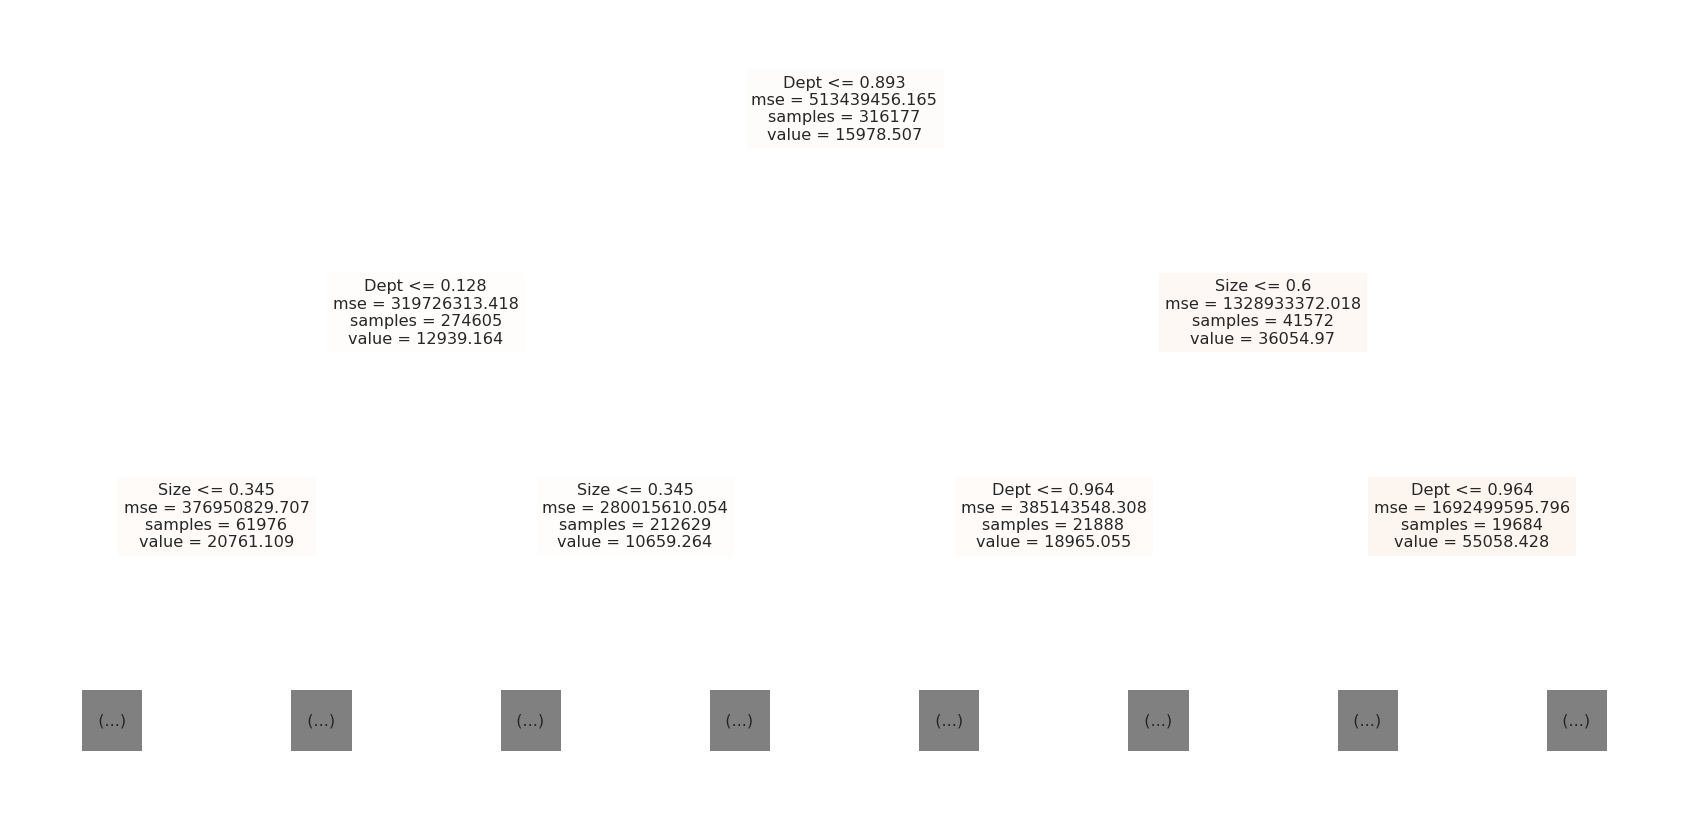

In [40]:
plt.figure(figsize=(30,15))

# Visualize the tree graphically using plot_tree
plot_tree(model1, feature_names = train_inputs.columns, max_depth=2, filled=True);

***LETS VISUALIZE THE DECISION TREE AS TEXT***

In [41]:
tree_text = export_text(model1, max_depth=10, feature_names=list(train_inputs.columns))
print(tree_text[:2000])

|--- Dept <= 0.89
|   |--- Dept <= 0.13
|   |   |--- Size <= 0.35
|   |   |   |--- Size <= 0.08
|   |   |   |   |--- Dept <= 0.02
|   |   |   |   |   |--- Dept <= 0.01
|   |   |   |   |   |   |--- Type_A <= 0.50
|   |   |   |   |   |   |   |--- Temperature <= 0.77
|   |   |   |   |   |   |   |   |--- Unemployment <= 0.62
|   |   |   |   |   |   |   |   |   |--- Store <= 0.97
|   |   |   |   |   |   |   |   |   |   |--- Store <= 0.07
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- Store >  0.07
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |--- Store >  0.97
|   |   |   |   |   |   |   |   |   |   |--- Fuel_Price <= 0.31
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Fuel_Price >  0.31
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   

***HERE I HAVE DEFINED A HELPER FUNCTION TO VISUALIZE THE FEATURE IMPORTANCES OF MODEL AND RETURN A DATAFRAME CONTANING THEM***

In [42]:
def feature_importance(model):
    model_importances = model.feature_importances_
    
    #STORING FEATURE IMPORTANCES AS A PANDAS DATAFRAME
    model_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_importances}).sort_values('importance', ascending=False)
    
    #VISUALIZING THE FEATURE IMPORTANCES
    plt.figure(figsize=(12,6))
    plt.title('Top Feature Importances')
    sns.barplot(data=model_importance_df.head(10), x='importance', y='feature');
    plt.show()
    
    #RETURNING THE FEATURE IMPORTANCES DATAFRAME
    return model_importance_df

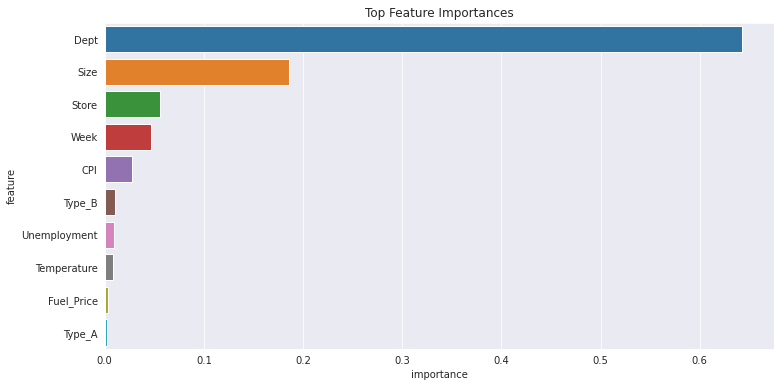

In [43]:
model1_importance_df = feature_importance(model1)

> IT LOOKS LIKE FOR OUR DECISION TREE MODEL, DEPT IS THE MOST IMPORTANT FEATURE

In [44]:
#FEATURE IMPORTANCES
model1_importance_df.sample(10)

,feature,importance
5,MarkDown2,0.000613
10,Unemployment,0.008997
1,Dept,0.643037
11,Size,0.185357
15,Type_A,0.002548
2,Temperature,0.008863
4,MarkDown1,0.000613
0,Store,0.055674
9,CPI,0.027683
7,MarkDown4,0.001628


**LETS TRAIN A XGBRegressor MODEL**

In [45]:
#DECLARING THE MODEL OBJECT
model2 = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=100, max_depth=10)

#FITTING THE DATA INTO THE MODEL
model2.fit(train_inputs, train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
#EVALUATING THE MODEL
model_eval(model2, train_inputs, train_targets, val_inputs, val_targets)

Train RMSE: 2143.8410884088976, Validation RMSE: 3381.6305248551635


> IT LOOKS LIKE OUR XGBregressor MODEL HAVE THE LEAST POSSIBLE RMSE WITH TUNED HYPERPARAMETERS

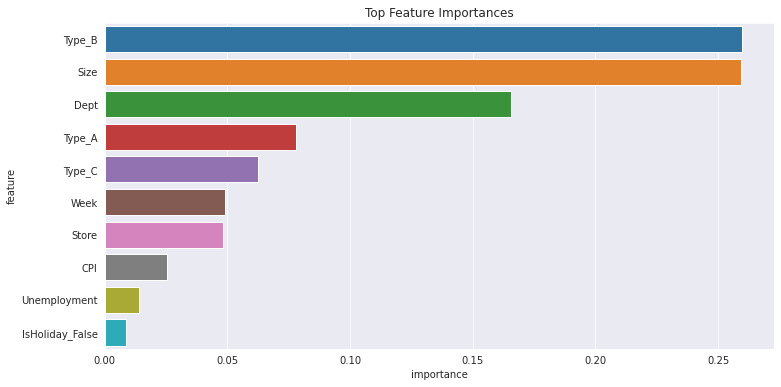

In [47]:
model2_importance_df = feature_importance(model2)

> IT LOOKS LIKE FOR OUR 2ND MODEL, TYPE_B COLUMN IS THE MOST IMPORTANT FEATURE

In [48]:
#FEATURE IMPORTANCES
model2_importance_df.sample(10)

,feature,importance
13,IsHoliday_False,0.008864
3,Fuel_Price,0.002634
16,Type_B,0.259898
9,CPI,0.025334
11,Size,0.259202
0,Store,0.048085
4,MarkDown1,0.002463
17,Type_C,0.062630
7,MarkDown4,0.005827
5,MarkDown2,0.002361


**LETS TRAIN A RANDOM FOREST MODEL**

In [49]:
#DECLARING THE MODEL OBJECT
model3 = RandomForestRegressor(n_jobs=-1, random_state=42)

#FITTING THE DATA INTO THE MODEL
model3.fit(train_inputs, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [50]:
#EVALUATING THE MODEL
model_eval(model3, train_inputs, train_targets, val_inputs, val_targets)

Train RMSE: 1383.2081904070008, Validation RMSE: 3792.0430486656714


> IT LOOKS LIKE RF MODEL'S RMSE IS LESS THAN OUR DECISON TREE MODEL BUT LESS THAN THE XGBRegressor MODEL

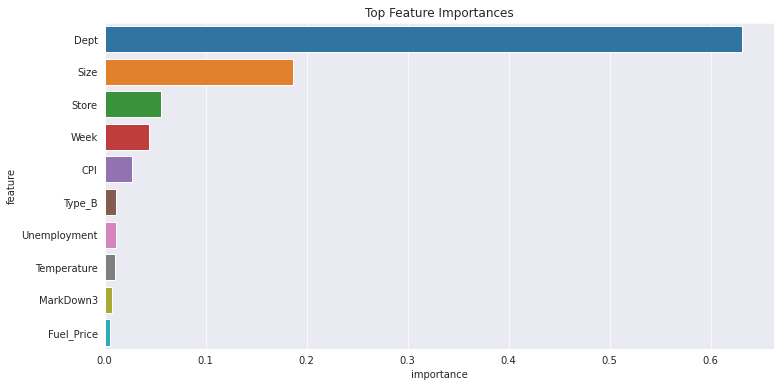

In [51]:
model3_importance_df = feature_importance(model3)

> IT LOOKS LIKE FOR OUR 3RD MODEL, DEPT IS THE MOST IMPORTANT FEATURE

In [52]:
#FEATURE IMPORTANCES
model3_importance_df.sample(10)

,feature,importance
15,Type_A,0.003328
7,MarkDown4,0.001829
2,Temperature,0.010525
8,MarkDown5,0.001368
17,Type_C,0.000389
12,Week,0.043666
0,Store,0.056169
13,IsHoliday_False,0.000853
3,Fuel_Price,0.005063
10,Unemployment,0.010708


**LETS LOOK AT OUR MERGED TEST DATASET**

In [53]:
merged_test_df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,2012,11,2,44
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,2012,11,9,45
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315,2012,11,16,46
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,2012,11,23,47
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315,2012,11,30,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221,2013,6,28,26
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221,2013,7,5,27
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221,2013,7,12,28
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221,2013,7,19,29


# **PREPROCESSING THE TEST DATASET**

In [54]:
X_test = merged_test_df.copy()

In [55]:
#IMPUTING MISSING DATA
X_test.replace(np.NaN, 0, inplace=True)
X_test.isna().sum()

#SCALING THE DATA
scaler1 = MinMaxScaler()
scaler1.fit(X_test[numeric_cols])
X_test[numeric_cols] = scaler1.transform(X_test[numeric_cols])

#ENCODING THE DATA
encoder1 = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
encoder1.fit(X_test[categorical_cols])
encoded_cols1 = list(encoder1.get_feature_names(categorical_cols))
encoded_cols1
X_test[encoded_cols1] = encoder1.transform(X_test[categorical_cols])
X_test

X_test = X_test.drop(['IsHoliday', 'Type', 'Date', 'Year', 'Month', 'Day'], axis=1)

In [56]:
X_test.sample(10)

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
104459,0.909091,0.183673,0.349231,0.100559,0.211965,0.016648,0.003956,0.468573,0.008396,0.877348,0.565840,0.873876,0.078431,1.0,0.0,1.0,0.0,0.0
69117,0.568182,0.591837,0.433358,0.601756,0.042744,0.000503,0.001445,0.001050,0.002197,0.607585,0.674968,0.636752,0.313725,1.0,0.0,1.0,0.0,0.0
90218,0.772727,0.040816,0.428231,0.589785,0.062312,0.215364,0.001256,0.009535,0.002437,0.623057,0.843220,0.372434,0.019608,1.0,0.0,0.0,1.0,0.0
70607,0.590909,0.173469,0.468327,0.795690,0.056168,0.000503,0.002741,0.000304,0.008342,0.621949,0.784391,0.916437,0.960784,1.0,0.0,1.0,0.0,0.0
39192,0.318182,0.489796,0.399213,0.857941,0.057894,0.060878,0.001452,0.005207,0.002465,0.604941,0.783606,0.480993,0.862745,1.0,0.0,0.0,1.0,0.0
3199,0.022727,0.102041,0.664134,0.410215,0.145283,0.000812,0.002002,0.075604,0.003360,0.000000,0.000000,0.906277,0.333333,1.0,0.0,1.0,0.0,0.0
17439,0.136364,0.377551,0.288631,0.600160,0.114676,0.001712,0.001917,0.044245,0.002036,0.878746,0.696833,0.193984,0.176471,1.0,0.0,0.0,1.0,0.0
54376,0.454545,0.132653,0.577627,0.180367,0.054741,0.001318,0.002120,0.000498,0.000981,0.975964,0.604961,0.569925,0.980392,1.0,0.0,0.0,1.0,0.0
54367,0.454545,0.122449,0.791285,0.545890,0.050773,0.008627,0.001971,0.012913,0.003308,0.000000,0.000000,0.569925,0.549020,1.0,0.0,0.0,1.0,0.0
110507,0.977273,0.030612,0.442695,0.548284,0.027599,0.000503,0.001198,0.000040,0.000589,0.579606,0.477694,0.027253,0.294118,1.0,0.0,0.0,0.0,1.0


***HERE I HAVE DEFINED A HELPER FUNCTION TO EVALUATE ALL THREE ML MODELS AND RETURN MEAN PREDICTIONS***

In [57]:
def models_mean_evaluation(model1, model2, model3, X_test, submission_df):
    #PREDICTING SALES
    test_preds1 = model1.predict(X_test)
    test_preds2 = model2.predict(X_test)
    test_preds3 = model3.predict(X_test)
    #AVERAGING THE PREDICTIONS
    mean_testpreds = (test_preds1+test_preds2+test_preds3)/3
    #ADDING PREDICTIONS TO SUBMISSION DATASET
    submission_df['Weekly_Sales'] = mean_testpreds
    #CONVERTING SUBMISSION DATASET AS A CSV FILE
    submission_df.to_csv('submission2.csv',index=False)
    #RETURNING MEAN PREDICTIONS
    return mean_testpreds

In [58]:
models_mean_evaluation(model1, model2, model3, X_test, submission_df)

array([28097.76005313, 18865.54196875, 19810.77291979, ...,
        1384.72143041,   885.69926934,   817.13466596])

> **ABOVE SEEMS TO BE OUR MEAN PREDICTIONS FROM OUR 3 MODELS WHICH SCORES BETTER THAN INDIVIDUAL MODEL PREDICTIONS(TESTED BY SUBMITTING PREDICTIONS ON KAGGLE)**

In [59]:
submission_df.sample(10)

,Id,Weekly_Sales
58292,22_58_2013-04-26,1803.927894
114123,45_54_2013-03-22,-172.033204
4189,2_38_2012-12-14,86914.975461
13939,6_18_2013-01-25,2841.860929
42424,16_81_2013-05-17,5263.171869
3831,2_28_2013-07-26,80.815812
32904,13_23_2013-06-14,42169.299659
65441,25_24_2013-04-12,3059.830695
22011,9_16_2012-12-14,3111.884673
16484,7_11_2012-11-23,21364.539612


# **SAVING PROCESSED DATA, MODELS AND SUBMISSION DATASET AS CSV**

In [60]:
#SAVING DATASETS AS PARQUETS
merged_df.to_parquet('merged_df.parquet')
merged_test_df.to_parquet('merged_test_df.parquet')
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('train_targets.parquet')    #FIRST CONVERTING THEM TO DFs
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

#STORING MODELS, SCALERS, ENCODERS AND IMP COLUMN LISTS IN A DICTIONARY
walmart_pred_data = {
    'model1': model1,
    'model2': model2,
    'model3': model3,
    'scaler': scaler,
    'encoder': encoder,
    'scaler1': scaler1,
    'encoder1': encoder1,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}
#SAVING THE DICT AS A JOBLIB FILE
joblib.dump(walmart_pred_data, 'walmart_pred_data.joblib')


['walmart_pred_data.joblib']

**REFERENCES -**

1. *jovian.ai*
2. *kaggle.com*
3. *scikit-learn.org*


**FUTURE PROJECT PREFERENCES AND IDEAS -**

1. *UNSUPERVISED ML MODELS*
2. *COLLABORATIVE FILTERING*
3. *DEEP LEARNING PROJECTS*
4. *NLP*